In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 5. 数据规整

## 5.1 基本处理方法

**（1） 丢弃指定轴上的数据** drop()

由于一些数据整理和集合逻辑，需要删除指定轴上的指定的值。drop()函数返回删除指定值后的新对象。

In [2]:
data=pd.DataFrame(np.arange(16).reshape(4,4),index=['Shenzhen','Guangzhou','Beijing','Shanghai'],columns=['one','two','three','four'])
data

,one,two,three,four
Shenzhen,0,1,2,3
Guangzhou,4,5,6,7
Beijing,8,9,10,11
Shanghai,12,13,14,15


In [6]:
data.drop(['Shenzhen'],axis=0)

,one,two,three,four
Guangzhou,4,5,6,7
Beijing,8,9,10,11
Shanghai,12,13,14,15


**（2）函数应用和映射** apply()、applymap()和map()

Numpy的[ufunc](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#ufunc)也可以用于操作pandas对象。

In [9]:
frame = pd.DataFrame(np.random.randn(4,3),index=['Shenzhen','Guangzhou','Shanghai','Beijing'],columns=['one','two','three'])

frame

,one,two,three
Shenzhen,-1.181892,-1.455347,-1.283855
Guangzhou,2.002363,-0.331398,0.883065
Shanghai,1.368181,-0.710973,1.554559
Beijing,-0.088993,1.262117,0.669833


In [10]:
np.fabs(frame)

,one,two,three
Shenzhen,0.880975,1.058700,0.263085
Guangzhou,0.150634,0.218120,1.414306
Shanghai,0.960572,0.998482,0.737461
Beijing,1.081020,0.742083,2.230744


另一种常见的操作就是，将函数应用到有各行各组成的一维数组上。apply()即可实现这种功能。

In [ ]:
f = lambda x : x.max()-x.min()
frame.apply(f)

In [ ]:
frame.apply(f,axis=1)#列方向

元素级的应用也是可以的，DataFrame的applymap()函数和Series的map()函数可以实现此功能。

In [44]:
# def f(a,n=1):
#     return a[:n]

In [49]:
frame['one'].apply(round)

Shenzhen    -1
Guangzhou    2
Shanghai     1
Beijing      0
Name: one, dtype: int64

In [ ]:
f = lambda x: '%.2f' %x
frame.applymap(f)

In [ ]:
frame.loc['Shenzhen'].map(f)

**(3) 排序和排名** sort_index()和sort_values()

按行或列索引进行排序，可以使用sort_index()，它将返回一个已经排的新对象。参考文档点击[这里](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index)。

In [50]:
data

,one,two,three,four
Shenzhen,0,1,2,3
Guangzhou,4,5,6,7
Beijing,8,9,10,11
Shanghai,12,13,14,15


In [ ]:
data.sort_index(axis=1,ascending=False)

根据指定的索引的对值进行排序，可以使用[sort_values()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)。

In [54]:
df = pd.DataFrame({'col1' : ['A', 'A', 'B', np.nan, 'D', 'C'],'col2' : [2, 1, 9, 8, 7, 4], 'col3': [0, 1, 9, 4, 2, 3],})
df

,col1,col2,col3
0,A,2,0
1,A,1,1
2,B,9,9
3,NaN,8,4
4,D,7,2
5,C,4,3


In [ ]:
df.sort_values(by=['col1','col2'], ascending=False, na_position='last')

In [41]:
df.sort_values(by=['col2'],ascending=False).sort_values(by=['col1'])

,col1,col2,col3
0,A,2,0
1,A,1,1
2,B,9,9
5,C,4,3
4,D,7,2
3,NaN,8,4


## 5.2 数据合并

pandas对象中的数据可以通过一些内置的方式进行合并：
+ **pandas.merge()** 可以根据一个或多个键将不同的DataFrame中的行进行连接；
+ **pandas.concat()** 可以沿着一条轴将多个对象堆叠在一起；
+ **combine_first()** 可以将重复数据拼接在一起，用一个对象中的值填充另一个对象中的缺失值。

**(1) merge()**  详细参数点击[这里](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html#pandas.DataFrame.merge)

In [10]:
df1 = pd.DataFrame({'key2':['foo','bar','baz','foo'],'data1':list(np.arange(1,5))})
df2 = pd.DataFrame({'key1':['foo','bar','qux','bar'],'data2':list(np.arange(5,9))})

In [11]:
print(df1)
print(df2)

  key2  data1
0  foo      1
1  bar      2
2  baz      3
3  foo      4
  key1  data2
0  foo      5
1  bar      6
2  qux      7
3  bar      8


In [5]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame objects by performing a database-style join operation by
    columns or indexes.
    
    If joining columns on columns, the DataFrame indexes *will be
    ignored*. Otherwise if joining indexes on indexes or indexes on a column or
    columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key order
        * outer: use union of keys from both frames, similar to a SQL full outer
          join;

类似数据库风格的合并：

In [55]:
df1.merge(df2,on='key1', how='right')#参数how代表连接方式，有'inner'、'left'、‘right’、‘outer’

,key1,data1,data2
0,foo,1.0,5
1,foo,4.0,5
2,bar,2.0,6
3,bar,2.0,8
4,qux,NaN,7


索引上的合并

In [23]:
left1=pd.DataFrame({'key':['a','c','b','c'],'value1':[1,2,3,4],'value2':[4,5,6,7]},index=['a','b','c','e'])
right1=pd.DataFrame([[7,8],[9,10],[11,12],[13,14]],index=['b','c','d','a'],columns=['value3','value4'])
print(left1)
print(right1)

  key  value1  value2
a   a       1       4
b   c       2       5
c   b       3       6
e   c       4       7
   value3  value4
b       7       8
c       9      10
d      11      12
a      13      14


In [56]:
left1.merge(right1,left_on='key',right_index=True,how='outer')

,key,value1,value2,value3,value4
a,a,1.0,4.0,13,14
b,c,2.0,5.0,9,10
c,b,3.0,6.0,7,8
c,d,NaN,NaN,11,12


In [ ]:
left1.merge(right1,left_on='key',right_index=True)#按键值与行索引进行合并

In [ ]:
left1.merge(right1,left_index=True,right_index=True)#按两者行索引进行合并

In [26]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'in

**(2) concat()**  详细参数点击[这里](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html#pandas.concat)

In [46]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],index=[1,4],columns=['letter1', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],columns=['number','letter'])
df1

,letter1,number
1,a,1
4,b,2


In [39]:
df2

,number,letter
0,c,3
1,d,4


In [49]:
pd.concat([df1,df2],axis=1,sort=False)

,letter1,number,number,letter
1,a,1,d,4


In [67]:
pd.concat([df1,df2],axis=0)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,letter,number
0,a,1
1,b,2
0,3,c
1,4,d


In [ ]:
pd.concat([df1, df2])#行方向连接

In [ ]:
pd.concat([df1, df2],axis=1)#列方向连接

**(3) combine_first**合并重叠数据(打补丁)

In [50]:
df1 = pd.DataFrame({'a':[1,np.nan,5.,np.nan],'b':[np.nan,2,np.nan,6],'c':list(np.arange(2,18,4))})
df2 = pd.DataFrame({'a':[5,4,np.nan,3,7],'b':[np.nan,3,4,6,8]})
df1
#df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [51]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [70]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## 5.3 数据重塑

层次化索引为DataFrame数据的重排任务提供了一种具有良好一致性的方式。主要有两种功能：
+ stack():将数据的列‘旋转’为行；
+ unstack():将数据的行‘旋转为列’；

In [53]:
import pandas as pd
import numpy as np

In [54]:
data = pd.DataFrame(np.arange(6).reshape(2,3),index=pd.Index(['Shenzhen','Guangzhou'],name='city'),
                    columns=pd.Index(['one','two','three'],name='number'))
data.loc['Guangzhou','three']=np.nan
data

number,one,two,three
city,,,
Shenzhen,0,1,2.0
Guangzhou,3,4,NaN


使用stack()将列转为行，默认是转到内层

In [20]:
result=data.stack()
result.unstack(0).stack()

number  city     
one     Shenzhen     0.0
        Guangzhou    3.0
two     Shenzhen     1.0
        Guangzhou    4.0
three   Shenzhen     2.0
dtype: float64

使用unstack()将行转为列,默认操作的是内层，可以根据分层级别或者名称对其他层进行操作。

In [ ]:
result.unstack(0)

# 6. 数据计算和统计

## 6.1 算术运算

pandas的一个重要功能是可以根据不同索引对象进行算术运算。可以用'+'、'-'、'/'等运算符，也可以直接调用函数，函数内相应的参数，方法更加灵活。更详细的算术函数点击[这里](http://pandas.pydata.org/pandas-docs/stable/api.html#id4)。

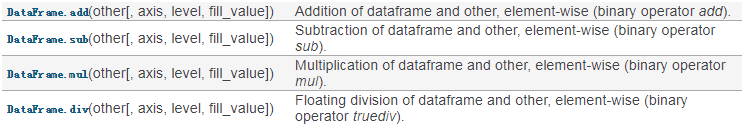

In [64]:
help(pd.DataFrame.add)

Help on function add in module pandas.core.ops:

add(self, other, axis='columns', level=None, fill_value=None)
    Addition of dataframe and other, element-wise (binary operator `add`).
    
    Equivalent to ``dataframe + other``, but with support to substitute a fill_value for
    missing data in one of the inputs.
    
    Parameters
    ----------
    other : Series, DataFrame, or constant
    axis : {0, 1, 'index', 'columns'}
        For Series input, axis to match Series index on
    level : int or name
        Broadcast across a level, matching Index values on the
        passed MultiIndex level
    fill_value : None or float value, default None
        Fill existing missing (NaN) values, and any new element needed for
        successful DataFrame alignment, with this value before computation.
        If data in both corresponding DataFrame locations is missing
        the result will be missing
    
    Notes
    -----
    Mismatched indices will be unioned together
    
    Re

In [62]:
df1 = pd.DataFrame(np.arange(1,13).reshape(3,4),columns=list('abcd'))
df2 = pd.DataFrame(np.arange(1,21).reshape(4,5),columns=list('abcde'))
print(df1)
print(df2)

   a   b   c   d
0  1   2   3   4
1  5   6   7   8
2  9  10  11  12
    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20


In [66]:
df1.add(df2,fill_value=0)

,a,b,c,d,e
0,2.0,4.0,6.0,8.0,5.0
1,11.0,13.0,15.0,17.0,10.0
2,20.0,22.0,24.0,26.0,15.0
3,16.0,17.0,18.0,19.0,20.0


In [63]:
df1+df2

,a,b,c,d,e
0,2.0,4.0,6.0,8.0,NaN
1,11.0,13.0,15.0,17.0,NaN
2,20.0,22.0,24.0,26.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [36]:
df1.mul(df2,fill_value=1)

,a,b,c,d,e
0,1.0,4.0,9.0,16.0,5.0
1,30.0,42.0,56.0,72.0,10.0
2,99.0,120.0,143.0,168.0,15.0
3,16.0,17.0,18.0,19.0,20.0


相加时，没有重叠的位置就会产生NA值。对于没有重叠的部分，我们想获取某一个DataFrame的值，那么我们可以指定一个填充值：

In [ ]:
df1.add(df2,fill_value=0)

上面针对的是两个DataFrame之间的运算，下面看看DataFrame和Series之间的运算。

In [67]:
frame=pd.DataFrame(np.arange(1,13).reshape(4,3),columns=list('bde'),index=['Shenzhen','Guangzhou','Shanghai','Beijing'])
frame

,b,d,e
Shenzhen,1,2,3
Guangzhou,4,5,6
Shanghai,7,8,9
Beijing,10,11,12


In [68]:
series = pd.Series(range(1,4),index=['b','e','f'])
series

b    1
e    2
f    3
dtype: int64

In [75]:
frame+series

,b,d,e,f
Shenzhen,2.0,NaN,5.0,NaN
Guangzhou,5.0,NaN,8.0,NaN
Shanghai,8.0,NaN,11.0,NaN
Beijing,11.0,NaN,14.0,NaN


In [74]:
frame.add(series)

,b,d,e,f
Shenzhen,2.0,NaN,5.0,NaN
Guangzhou,5.0,NaN,8.0,NaN
Shanghai,8.0,NaN,11.0,NaN
Beijing,11.0,NaN,14.0,NaN


In [26]:
frame + series

,b,d,e,f
Shenzhen,2.0,NaN,5.0,NaN
Guangzhou,5.0,NaN,8.0,NaN
Shanghai,8.0,NaN,11.0,NaN
Beijing,11.0,NaN,14.0,NaN


In [78]:
frame['d']

Shenzhen      2
Guangzhou     5
Shanghai      8
Beijing      11
Name: d, dtype: int32

In [79]:
frame

,b,d,e
Shenzhen,1,2,3
Guangzhou,4,5,6
Shanghai,7,8,9
Beijing,10,11,12


In [85]:
frame.add(frame['d'],axis=1)#逐列进行加和

,Beijing,Guangzhou,Shanghai,Shenzhen,b,d,e
Shenzhen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Guangzhou,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shanghai,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beijing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 6.2 计算统计描述

pandas对象拥有一组常用的数学和统计方法，大部分都属于简约和汇总统计，用于从Series中提取单个值，或者从DataFrame的行或列中提取一个Series。详细的函数点击[这里](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats)。

### 6.2.1 简约和汇总统计

先看看比较常用sum()和mean(）方法，两者包含参数都差不多。约简方法的常用选项如下：

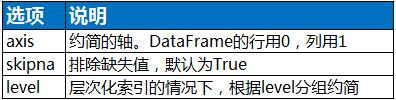

In [95]:
df = pd.DataFrame([[1.4,np.nan],[7.1,-4.5],[np.nan,np.nan],[0.75,-1.3]],index=list('abcd'),columns=['one','two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [96]:
df.nunique()

one    3
two    2
dtype: int64

In [45]:
df.sum(axis = 0)

one    9.25
two   -5.80
dtype: float64

在默认情况下，axis=0。自动将NA值排除，通过skipna可以自动忽略该功能。

In [ ]:
df.sum(axis=1,skipna=False)

有一些方法是累积型的：

In [101]:
df.cumprod()

,one,two
a,1.400,NaN
b,9.940,-4.50
c,NaN,NaN
d,7.455,5.85


还有想discribe()函数，既不是约简型，也不是累积型，他一次性可以返回多个汇总统计：

In [107]:
df=pd.DataFrame(np.arange(20).reshape(4,5))
df['one']=pd.Series(list('abdd'))
df['sex']=pd.Series([1,1,0,0])
df.iloc[2,2]=np.nan
df

,0,1,2,3,4,one,sex
0,0,1,2.0,3,4,a,1
1,5,6,7.0,8,9,b,1
2,10,11,NaN,13,14,d,0
3,15,16,17.0,18,19,d,0


In [111]:
df.describe()

,0,1,2,3,4,sex
count,4.000000,4.000000,3.000000,4.000000,4.000000,4.00000
mean,7.500000,8.500000,8.666667,10.500000,11.500000,0.50000
std,6.454972,6.454972,7.637626,6.454972,6.454972,0.57735
min,0.000000,1.000000,2.000000,3.000000,4.000000,0.00000
25%,3.750000,4.750000,4.500000,6.750000,7.750000,0.00000
50%,7.500000,8.500000,7.000000,10.500000,11.500000,0.50000
75%,11.250000,12.250000,12.000000,14.250000,15.250000,1.00000
max,15.000000,16.000000,17.000000,18.000000,19.000000,1.00000


In [65]:
df.describe(include=[np.object])

,one
count,4
unique,3
top,d
freq,2


### 6.2.2 相关系数与协方差

有些汇总统计(如相关系数和协方差)是通过参数对计算出来的。

In [112]:
df = pd.DataFrame({"id":[1001,1002,1003,1004,1005,1006], 
 "date":pd.date_range('20130102', periods=6),
  "city":['Beijing ', 'ShangHai', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
 "age":[23,44,54,32,34,32],
 "category":['100-A','100-B','110-A','110-C','210-A','130-F'],
  "price":[1200,np.nan,2133,5433,np.nan,4432]},
  columns =['id','date','city','category','age','price'])
df

,id,date,city,category,age,price
0,1001,2013-01-02,Beijing,100-A,23,1200.0
1,1002,2013-01-03,ShangHai,100-B,44,NaN
2,1003,2013-01-04,guangzhou,110-A,54,2133.0
3,1004,2013-01-05,Shenzhen,110-C,32,5433.0
4,1005,2013-01-06,shanghai,210-A,34,NaN
5,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [113]:
df1=pd.DataFrame({"id":[1001,1002,1003,1004,1005,1006,1007,1008], 
"gender":['male','female','male','female','male','female','male','female'],
"pay":['Y','N','Y','Y','N','Y','N','Y',],
"m-point":[10,12,20,40,40,40,30,20]})
df1

,id,gender,pay,m-point
0,1001,male,Y,10
1,1002,female,N,12
2,1003,male,Y,20
3,1004,female,Y,40
4,1005,male,N,40
5,1006,female,Y,40
6,1007,male,N,30
7,1008,female,Y,20


In [114]:
df_inner=pd.merge(df,df1,how='inner')
df_inner

,id,date,city,category,age,price,gender,pay,m-point
0,1001,2013-01-02,Beijing,100-A,23,1200.0,male,Y,10
1,1002,2013-01-03,ShangHai,100-B,44,NaN,female,N,12
2,1003,2013-01-04,guangzhou,110-A,54,2133.0,male,Y,20
3,1004,2013-01-05,Shenzhen,110-C,32,5433.0,female,Y,40
4,1005,2013-01-06,shanghai,210-A,34,NaN,male,N,40
5,1006,2013-01-07,BEIJING,130-F,32,4432.0,female,Y,40


In [117]:
df_inner.corr()

,id,age,price,m-point
id,1.000000,-0.034401,0.792239,0.928096
age,-0.034401,1.000000,-0.086895,-0.194833
price,0.792239,-0.086895,1.000000,0.975325
m-point,0.928096,-0.194833,0.975325,1.000000


In [70]:
df_inner['price'].cov(df_inner['m-point']) #两个字段之间的协方差

28771.666666666664

In [71]:
df_inner['price'].corr(df_inner['m-point']) #相关系数在-1到1之间，接近1为正相关，接近-1为负相关，0为不相关

0.9753247017958027

In [72]:
df_inner.cov()#数据表所有字段之间的协方差

,id,age,price,m-point
id,3.500000,-0.700000,3.243333e+03,25.400000
age,-0.700000,118.300000,-2.255833e+03,-31.000000
price,3243.333333,-2255.833333,3.867667e+06,28771.666667
m-point,25.400000,-31.000000,2.877167e+04,214.000000


In [73]:
df_inner.corr()#数据表中字段之间的相关系数矩阵

,id,age,price,m-point
id,1.000000,-0.034401,0.792239,0.928096
age,-0.034401,1.000000,-0.086895,-0.194833
price,0.792239,-0.086895,1.000000,0.975325
m-point,0.928096,-0.194833,0.975325,1.000000


# 7. 数据汇总

## 7.1 数据聚合

**(1) 一般性用法**

groupby()的详细用法点击[这里](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)。

In [119]:
df = pd.DataFrame({"id":[1001,1002,1003,1004,1005,1006], 
 "date":pd.date_range('20130102', periods=6),
  "city":['Beijing ', 'ShangHai', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
 "age":[23,44,54,32,34,32],
 "category":['100-A','100-B','110-A','110-C','210-A','130-F'],
  "price":[1200,np.nan,2133,5433,np.nan,4432]},
  columns =['id','date','city','category','age','price'])
df1=pd.DataFrame({"id":[1001,1002,1003,1004,1005,1006,1007,1008], 
"gender":['male','female','male','female','male','female','male','female'],
"pay":['Y','N','Y','Y','N','Y','N','Y',],
"m-point":[10,12,20,40,40,40,30,20]})
df

,id,date,city,category,age,price
0,1001,2013-01-02,Beijing,100-A,23,1200.0
1,1002,2013-01-03,ShangHai,100-B,44,NaN
2,1003,2013-01-04,guangzhou,110-A,54,2133.0
3,1004,2013-01-05,Shenzhen,110-C,32,5433.0
4,1005,2013-01-06,shanghai,210-A,34,NaN
5,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [120]:
df1

,id,gender,pay,m-point
0,1001,male,Y,10
1,1002,female,N,12
2,1003,male,Y,20
3,1004,female,Y,40
4,1005,male,N,40
5,1006,female,Y,40
6,1007,male,N,30
7,1008,female,Y,20


In [121]:
df_inner=pd.merge(df,df1,how='inner')
df_inner

,id,date,city,category,age,price,gender,pay,m-point
0,1001,2013-01-02,Beijing,100-A,23,1200.0,male,Y,10
1,1002,2013-01-03,ShangHai,100-B,44,NaN,female,N,12
2,1003,2013-01-04,guangzhou,110-A,54,2133.0,male,Y,20
3,1004,2013-01-05,Shenzhen,110-C,32,5433.0,female,Y,40
4,1005,2013-01-06,shanghai,210-A,34,NaN,male,N,40
5,1006,2013-01-07,BEIJING,130-F,32,4432.0,female,Y,40


In [77]:
df_inner.groupby('gender')['age'].mean()

gender
female    36
male      37
Name: age, dtype: int64

按单个列对所有其他列进行聚合

In [79]:
df_inner['city']=df_inner['city'].str.strip().str.title()
df_inner

,id,date,city,category,age,price,gender,pay,m-point
0,1001,2013-01-02,Beijing,100-A,23,1200.0,male,Y,10
1,1002,2013-01-03,Shanghai,100-B,44,NaN,female,N,12
2,1003,2013-01-04,Guangzhou,110-A,54,2133.0,male,Y,20
3,1004,2013-01-05,Shenzhen,110-C,32,5433.0,female,Y,40
4,1005,2013-01-06,Shanghai,210-A,34,NaN,male,N,40
5,1006,2013-01-07,Beijing,130-F,32,4432.0,female,Y,40


In [82]:
df_inner.groupby('city')['age'].median()

city
Beijing      27.5
Guangzhou    54.0
Shanghai     39.0
Shenzhen     32.0
Name: age, dtype: float64

按单个列对所有其他单个列进行聚合

In [91]:
df_inner.groupby(['gender'])['age'].mean().unstack(0)

pay,N,Y
gender,,
female,44.0,32.0
male,34.0,38.5


按多个列对其他列进行进行聚合

In [26]:
df_inner.groupby(['city','pay'])['id'].count().unstack(0)

city,Guangzhou,Beijing,Shanghai,Shenzhen
pay,,,,
N,NaN,NaN,2.0,NaN
Y,1.0,2.0,NaN,1.0


多函数应用

In [93]:
df_inner.groupby('pay')['price'].agg([len,np.sum,np.mean]) 

,len,sum,mean
pay,,,
N,2.0,0.0,NaN
Y,4.0,13198.0,3299.5


**(2) apply()** 一般性的"拆分——应用——合并"

In [130]:
tips = pd.read_csv('data/tips.csv')
tips
tips['tip_pac']=tips['tip']/tips['total_bill']#添加‘小费占总额百分比’的列
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pac
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [136]:
def f(s,n=5):
    return s.sort_values(ascending=False)[:n]

In [138]:
tips.groupby('smoker')['tip_pac'].apply(f,n=3)

smoker     
No      232    0.291990
        149    0.266312
        51     0.252672
Yes     172    0.710345
        178    0.416667
        67     0.325733
Name: tip_pac, dtype: float64

In [141]:
def top100(df,columns='tip',top=5):
    return df.sort_values(by=columns,ascending=False)[:top]

In [143]:
tips.groupby('smoker').apply(top100)

smoker     
No      212    0.186220
        23     0.192288
        59     0.139424
        141    0.195335
        47     0.185185
Yes     170    0.196812
        183    0.280535
        214    0.230742
        181    0.242177
        211    0.199305
Name: tip_pac, dtype: float64

In [31]:
#找出top N
def top(df,n=5,column='tip_pac'):
    return df.sort_values(by=column)[-n:]

In [32]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pac
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [34]:
tips.groupby('smoker').apply(top,n=3,column='total_bill')

total_bill    tip     sex smoker  day    time  size   tip_pac
smoker                                                                   
No     156       48.17   5.00    Male     No  Sun  Dinner     6  0.103799
       59        48.27   6.73    Male     No  Sat  Dinner     4  0.139424
       212       48.33   9.00    Male     No  Sat  Dinner     4  0.186220
Yes    102       44.30   2.50  Female    Yes  Sat  Dinner     3  0.056433
       182       45.35   3.50    Male    Yes  Sun  Dinner     3  0.077178
       170       50.81  10.00    Male    Yes  Sat  Dinner     3  0.196812

## 7.2 透视表和交叉表

**(1) 透视表** pivot_table()，详细参数点击[这里](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html#pandas.pivot_table)

In [156]:
tips.pivot_table(values='tip',index=['sex'],columns='smoker',margins=True,margins_name='总计',aggfunc=len)

smoker,No,Yes,总计
sex,,,
Female,54.0,33.0,87.0
Male,97.0,60.0,157.0
总计,151.0,93.0,244.0


In [51]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pac
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [137]:
import numpy as np
tips.pivot_table(index=['sex'],columns=['smoker'],values=['tip','tip_pac'],margins=False,aggfunc=np.mean)

tip             tip_pac          
smoker        No       Yes        No       Yes
sex                                           
Female  2.773519  2.931515  0.156921  0.182150
Male    3.113402  3.051167  0.160669  0.152771

In [154]:
tips.groupby(['sex','time','smoker'])['tip'].mean().unstack()

smoker               No       Yes
sex    time                      
Female Dinner  3.044138  2.949130
       Lunch   2.459600  2.891000
Male   Dinner  3.158052  3.123191
       Lunch   2.941500  2.790769

In [53]:
tips.pivot_table(index=['sex','smoker'])#计算的是分组平均数

size       tip   tip_pac  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [62]:
tips.pivot_table(values=['total_bill','size'],index=['sex','day'],columns='smoker',margins=False,aggfunc=np.sum)#计算的是分组平均数

size     total_bill        
smoker        No Yes         No     Yes
sex    day                             
Female Fri     5  14      38.73   88.58
       Sat    30  33     247.05  304.00
       Sun    43  10     291.54   66.16
       Thur   62  17     400.36  134.53
Male   Fri     4  17      34.95  163.62
       Sat    85  71     637.73  589.62
       Sun   124  39     877.34  392.12
       Thur   50  23     369.73  191.71

**(2) 交叉表** crosstab()，详细参数点击[这里](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html#pandas.crosstab)。

In [159]:
pd.crosstab(index=tips['smoker'],columns=tips['sex'],values=tips['tip'],margins=True,aggfunc=np.mean)

sex,Female,Male,All
smoker,,,
No,2.773519,3.113402,2.991854
Yes,2.931515,3.051167,3.008710
All,2.833448,3.089618,2.998279


交叉表是一种用于计算分组频数的特殊透视表。

In [144]:
pd.crosstab(index=tips['time'],columns=tips['day'],margins=True)

day,Fri,Sat,Sun,Thur,All
time,,,,,
Dinner,12,87,76,1,176
Lunch,7,0,0,61,68
All,19,87,76,62,244


In [60]:
pd.crosstab(index=[tips.time,tips.day],columns=tips.smoker,margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

# 练习

根据2012年美国联邦选举委员会总统大选的数据集，其中包括赞助者的姓名、职业、雇主、地址以及出资额等信息，分析赞助情况。

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
fec = pd.read_csv('data/2012FederalElectoralCommission.csv')

d:\program files\python3.6\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 数据清洗

In [38]:
fec.info()#查看基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


不难看出，这些信息里面没有党派信息，因此我们需要把它加进去。

In [39]:
fec.cand_nm.unique()#查看参选人的名单

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

名单里面除了Obama是民主党，其他都是共和党。

In [40]:
#函数实现Obama是民主党，其他人是共和党
def party(s):
    if s=='Obama, Barack':
        return 'Democrat'
    else:
        return 'Repulican'

In [41]:
fec['party']=fec['cand_nm'].apply(party)#添加党派一列
fec['party'].value_counts()#查看两个党派支持频数

Democrat     593746
Repulican    407985
Name: party, dtype: int64

另外，该数据包括了赞助，也包括了退款(负的出资)。

In [42]:
(fec.contb_receipt_amt>0).value_counts()#查看正负出资数量

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

为了简化分析，这里限定只能有正的出资额。

In [43]:
fec = fec[fec.contb_receipt_amt>0]

### 根据职业和雇主统计赞助信息

查看下对竞选支持Top10的职业。

In [44]:
fec.contbr_occupation.unique()

array(['RETIRED', 'INFORMATION REQUESTED', 'RN', ...,
       'SAFETY SALES MANAGER', 'PRESIDENT & GENERAL MANAGER',
       'LONGWALL MAINTENANCE FOREMAN'], dtype=object)

In [45]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

不难看出许多职业都涉及相同的基本工作原理，下面做一些清理：

In [46]:
#对职业进行相应的处理
occ_mapping={'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
             'INFORMATION REQUESTED':'NOT PROVIDED',
             'INFORMATION REQUESTED (BEST EFFORTS)':'NOT PROVIDED',
             'C.E.O.':'CEO'}
#如果没有提供相关的映射，则返回x
f = lambda x:occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.apply(f)

In [47]:
#对雇主进行相应的处理
emp_mapping={'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
             'INFORMATION REQUESTED':'NOT PROVIDED',
             'SELF':'SELF-EMPLOYED',
             'SELF EMPLOYED':'SELF-EMPLOYED'}
#如果没有提供相关的映射，则返回x
f=lambda x:emp_mapping.get(x,x)
fec.contbr_employer=fec.contbr_employer.map(f)

现在可以用透视表pivot_table()根据党派和职业，然后过滤总出资额不足200万美元的数据：

In [63]:
occupation = fec.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc=np.sum)
occupation
over_2mm = occupation[occupation.sum(1)>2000000]
over_2mm

party,Democrat,Repulican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


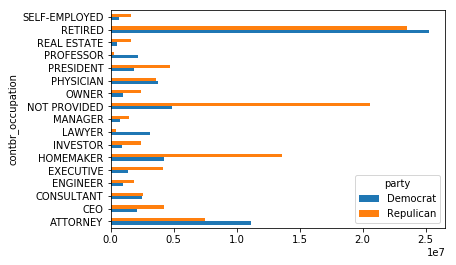

In [64]:
over_2mm.plot(kind='barh')

Obama和Romney是最主要的两名候选人，所以在这里准备一个子集，包含针对这两个人的竞选活动的赞助信息：

In [66]:
fec_mrbo = fec[fec['cand_nm'].isin(['Obama, Barack','Romney, Mitt'])]

我们想了解下对Obama和Romney总出资额最高的职业和企业：

In [67]:
def get_top_amounts(group,key,n=5):#根据key分组求和，进行排序，取前n项
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]
occupation_amt = fec_mrbo.groupby('cand_nm').apply(get_top_amounts,key='contbr_occupation',n=7)
occupation_amt

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [68]:
fec_mrbo.groupby('cand_nm').apply(get_top_amounts,key='contbr_employer',n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694358.85
               SELF-EMPLOYED         18626807.16
               NOT EMPLOYED           8586308.70
               NOT PROVIDED           5053480.37
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12059527.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

### 出资额分组

还可以对该数据做另一个非常实用的分析：利用cut函数根据出资额大小将数据离散化处理：

In [69]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)

查看不同出资额的分组下，对两位候选人获得的数量：

In [70]:
fec_mrbo.groupby(['cand_nm',labels]).size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


在要求的出资额的规格内，对出资额的总和：

In [71]:
bucket_sums = fec_mrbo.groupby(['cand_nm',labels])['contb_receipt_amt'].sum().unstack(0)
bucket_sums 

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


两个候选人各种赞助额度比例：

In [72]:
normed_sums=bucket_sums.div(bucket_sums.sum(1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


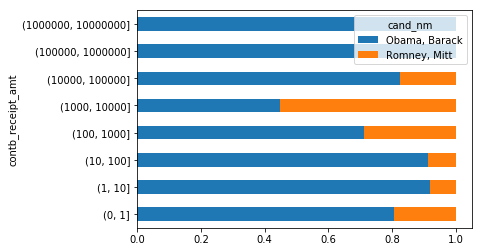

In [73]:
normed_sums.plot(kind='barh',stacked=True)#图形化显示